In [86]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import load_data
import nan_imputation
import helpers
from helpers import find_repo_root

In [2]:
# Reload isdead.py
import importlib
importlib.reload(load_data)
importlib.reload(nan_imputation)
importlib.reload(helpers)

<module 'helpers' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/helpers.py'>

## Step 0 : Load the Data

In [3]:
repo_root = find_repo_root()
repo_root

data_path = os.path.join(repo_root, 'Data/Lifespan')

In [4]:
worms = load_data.load_lifespan(data_path)
#worms.pop("worm_1_companyDrug", None)  # The second argument avoids KeyError if the key doesn't exist

In [5]:
# just a check print on worm 3 (companyDrug)
worm_name = 'worm_3'  # Change this to the name of the worm you want to print
print(f"Worm: {worm_name}")
worm_data = worms[worm_name]
df = pd.DataFrame(worm_data.T, columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category'])
print(df)

Worm: worm_3
         Frame     Speed           X           Y  Changed Pixels  Category
0          1.0  0.000000  270.078261  110.278261             0.0       0.0
1          2.0  0.088129  270.078261  110.278261             1.0       0.0
2          3.0  0.100739  270.112069  110.250000             1.0       0.0
3          4.0  0.000000  270.162393  110.247863             0.0       0.0
4          5.0  0.334962  270.162393  110.247863             3.0       0.0
...        ...       ...         ...         ...             ...       ...
53990  10795.0  0.023434  557.853448  215.936782             1.0       0.0
53991  10796.0  0.107492  557.853026  215.925072             5.0       0.0
53992  10797.0  0.386756  557.807471  215.896552            11.0       0.0
53993  10798.0  0.590065  557.630372  215.974212            32.0       0.0
53994  10799.0  1.183972  557.374640  215.827089            66.0       0.0

[53995 rows x 6 columns]


In [6]:
helpers.print_fdict_summary(worms)  


Summary of Loaded Worm Data:
Worm: worm_1
  Shape: (6, 75593)
----------------------------------------
Worm: worm_2
  Shape: (6, 53995)
----------------------------------------
Worm: worm_3
  Shape: (6, 53995)
----------------------------------------
Worm: worm_4
  Shape: (6, 75593)
----------------------------------------
Worm: worm_5
  Shape: (6, 75593)
----------------------------------------
Worm: worm_6
  Shape: (6, 64794)
----------------------------------------
Worm: worm_7
  Shape: (6, 75593)
----------------------------------------
Worm: worm_8
  Shape: (6, 75593)
----------------------------------------
Worm: worm_9
  Shape: (6, 75593)
----------------------------------------
Worm: worm_10
  Shape: (6, 53995)
----------------------------------------
Worm: worm_11
  Shape: (6, 75593)
----------------------------------------
Worm: worm_12
  Shape: (6, 75593)
----------------------------------------
Worm: worm_13
  Shape: (6, 75593)
----------------------------------------
Worm

## Step 1 : NaN imputation
> impute only on X and Y columns since only where there are NaN

In [7]:
for name, lifespan_array in worms.items(): 
    print(f"Processing {name}")
    lifespan_arrayxy = lifespan_array[2:4,:]  # Extract columns for X and Y
    missing_sequences = nan_imputation.count_successive_missing(lifespan_arrayxy)
    for start, end, length in missing_sequences:
        print(f"  Missing sequence starts at column {start}, ends at column {end - 1}, length: {length}")

Processing worm_1
  Missing sequence starts at column 361, ends at column 368, length: 8
  Missing sequence starts at column 609, ends at column 610, length: 2
  Missing sequence starts at column 859, ends at column 899, length: 41
  Missing sequence starts at column 1018, ends at column 1076, length: 59
  Missing sequence starts at column 1127, ends at column 1154, length: 28
  Missing sequence starts at column 1178, ends at column 1208, length: 31
  Missing sequence starts at column 4077, ends at column 4093, length: 17
  Missing sequence starts at column 4127, ends at column 4189, length: 63
  Missing sequence starts at column 4744, ends at column 4768, length: 25
  Missing sequence starts at column 5469, ends at column 5562, length: 94
  Missing sequence starts at column 5693, ends at column 5719, length: 27
  Missing sequence starts at column 5727, ends at column 5920, length: 194
  Missing sequence starts at column 5922, ends at column 5924, length: 3
  Missing sequence starts at

In [8]:
#print(lifespan_arrayxy)
print(f"Missing sequences for {name}: {missing_sequences}")

Missing sequences for worm_36: [(5742, 5770, 28), (5951, 5956, 5), (6365, 7090, 725), (7411, 7585, 174), (7771, 8101, 330), (9000, 10839, 1839), (16200, 16380, 180), (17226, 17304, 78), (17311, 17432, 121), (17461, 17642, 181), (17643, 17645, 2), (17735, 17764, 29), (17782, 17795, 13), (17973, 18000, 27), (19630, 19800, 170), (24362, 24562, 200), (25096, 25169, 73), (25248, 26099, 851), (26818, 26999, 181), (29698, 29722, 24), (30598, 31214, 616)]


In [9]:
# Rows to check for missing values (2:4 in zero-based indexing)
rows_to_check = slice(2, 4)  # Rows 2 and 3 not row 4

# Apply cut_array to each worm in the dataset
cut_nan_dict = {name: nan_imputation.cut_array(array, rows_to_check) for name, array in worms.items()}

In [10]:
# Print the shape of the filtered arrays
for name, item in cut_nan_dict.items():
    print(f'{name} : {item.shape}')

worm_1 : (6, 74414)
worm_2 : (6, 53396)
worm_3 : (6, 52787)
worm_4 : (6, 74062)
worm_5 : (6, 72595)
worm_6 : (6, 64759)
worm_7 : (6, 70217)
worm_8 : (6, 72216)
worm_9 : (6, 71822)
worm_10 : (6, 52217)
worm_11 : (6, 75159)
worm_12 : (6, 72932)
worm_13 : (6, 75343)
worm_14 : (6, 74855)
worm_15 : (6, 64534)
worm_16 : (6, 74307)
worm_17 : (6, 75395)
worm_18 : (6, 75593)
worm_19 : (6, 74496)
worm_20 : (6, 72844)
worm_21 : (6, 73638)
worm_22 : (6, 53811)
worm_23 : (6, 74689)
worm_24 : (6, 73516)
worm_25 : (6, 63319)
worm_26 : (6, 42253)
worm_27 : (6, 71833)
worm_28 : (6, 57462)
worm_29 : (6, 64033)
worm_30 : (6, 72883)
worm_31 : (6, 64658)
worm_32 : (6, 75349)
worm_33 : (6, 60114)
worm_34 : (6, 48238)
worm_35 : (6, 50937)
worm_36 : (6, 58947)


In [11]:
# just a check print --> If we check we do have the number of frames decreased (because NaNs where removed) --> example with worm_3
worm_name = 'worm_3'  # Change this to the name of the worm you want to print
print(f"Worm: {worm_name}")
worm_data = cut_nan_dict[worm_name]
df = pd.DataFrame(worm_data.T, columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category'])

# Check for NaN values in the DataFrame
if df.isna().sum().sum() == 0:
    print(f"Worm {worm_name} has no NaN values after NaN imputation.")
else:
    print(f"Worm {worm_name} still contains NaN values.")

df

#And we see that the total number of frames is decreased 

Worm: worm_3
Worm worm_3 has no NaN values after NaN imputation.


,Frame,Speed,X,Y,Changed Pixels,Category
0,1.0,0.000000,270.078261,110.278261,0.0,0.0
1,2.0,0.088129,270.078261,110.278261,1.0,0.0
2,3.0,0.100739,270.112069,110.250000,1.0,0.0
3,4.0,0.000000,270.162393,110.247863,0.0,0.0
4,5.0,0.334962,270.162393,110.247863,3.0,0.0
...,...,...,...,...,...,...
52782,10795.0,0.023434,557.853448,215.936782,1.0,0.0
52783,10796.0,0.107492,557.853026,215.925072,5.0,0.0
52784,10797.0,0.386756,557.807471,215.896552,11.0,0.0
52785,10798.0,0.590065,557.630372,215.974212,32.0,0.0


# Step 2 : Figure out when do the worms die
>When we find out on which frame he dies, drop the frames after his death

In [12]:
import isdead
importlib.reload(isdead)

<module 'isdead' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/isdead.py'>

In [13]:
movement_threshold = 1.0 # Threshold for inactivity detection
processed_worms = {} # Dictionary to store processed worms

dying_times = []

# Use the cleaned data from nan_imputation
cleaned_worms = cut_nan_dict  # Replace with the variable holding your cleaned data

# Iterate through each worm in the dataset
for worm_name, worm_data in cleaned_worms.items():
    print(f"Processing {worm_name}...")
    # Transpose worm_data for DataFrame creation
    df_worm = pd.DataFrame(worm_data.T,columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category']) # Transpose the array

    result = isdead.estimate_dying_time(df_worm, movement_threshold) # Use the estimate_dying_time function to find the dying frame
    if result[0] is None:
        print(f"  {worm_name}: No inactivity detected. Retaining all data.")
        processed_worms[worm_name] = worm_data
        continue

    dying_frame, absolute_frame, dying_time_hours, segment_number = result
  
    dying_times.append(dying_time_hours) # Append dying time in hours to the list

    print(f"  {worm_name}: Dying frame = {dying_frame} of Segment = {segment_number}, Absolute frame = {absolute_frame}, Dying time = {dying_time_hours:.2f} hours") # Print details

    # Truncate the data up to the dying frame
    truncated_data = worm_data[:, worm_data[0, :] <= dying_frame]
    processed_worms[worm_name] = truncated_data

# Print summary of processed worms
print("\nSummary of processed worms:")
for name, data in processed_worms.items():
    print(f"{name}: Original frames = {worms[name].shape[1]}, After truncation = {data.shape[1]}")

Processing worm_1...
  worm_1: Dying frame = 9293.0 of Segment = 6, Absolute frame = 72908, Dying time = 486.00 hours
Processing worm_2...
  worm_2: Dying frame = 9853.0 of Segment = 4, Absolute frame = 52450, Dying time = 348.14 hours
Processing worm_3...
  worm_3: Dying frame = 9902.0 of Segment = 4, Absolute frame = 51890, Dying time = 342.33 hours
Processing worm_4...
  worm_4: Dying frame = 9002.0 of Segment = 6, Absolute frame = 72265, Dying time = 480.15 hours
Processing worm_5...
  worm_5: Dying frame = 10142.0 of Segment = 6, Absolute frame = 71938, Dying time = 474.47 hours
Processing worm_6...
  worm_6: Dying frame = 10568.0 of Segment = 5, Absolute frame = 64528, Dying time = 426.35 hours
Processing worm_7...
  worm_7: Dying frame = 10537.0 of Segment = 6, Absolute frame = 69955, Dying time = 462.36 hours
Processing worm_8...
  worm_8: Dying frame = 9002.0 of Segment = 6, Absolute frame = 70419, Dying time = 468.12 hours
Processing worm_9...
  worm_9: Dying frame = 9293.0 o

In [14]:
# just a check print --> Check worm 3
worm_name = 'worm_3'  # Change this to the name of the worm you want to print
print(f"Worm: {worm_name}")
worm_data = processed_worms[worm_name]
df = pd.DataFrame(worm_data.T, columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category'])
df

# this for a movement threshold of 1.0
# check worm 3 : Loading Data = 64794 --> Removing NaNs = 64533 frames --> Removing dead franes = 62175 Frames

Worm: worm_3


,Frame,Speed,X,Y,Changed Pixels,Category
0,1.0,0.000000,270.078261,110.278261,0.0,0.0
1,2.0,0.088129,270.078261,110.278261,1.0,0.0
2,3.0,0.100739,270.112069,110.250000,1.0,0.0
3,4.0,0.000000,270.162393,110.247863,0.0,0.0
4,5.0,0.334962,270.162393,110.247863,3.0,0.0
...,...,...,...,...,...,...
48297,9898.0,0.200980,557.556474,216.011019,5.0,0.0
48298,9899.0,0.479200,557.459016,216.035519,8.0,0.0
48299,9900.0,2.541057,557.599462,215.841398,69.0,0.0
48300,9901.0,0.064484,557.357341,217.088643,1.0,0.0


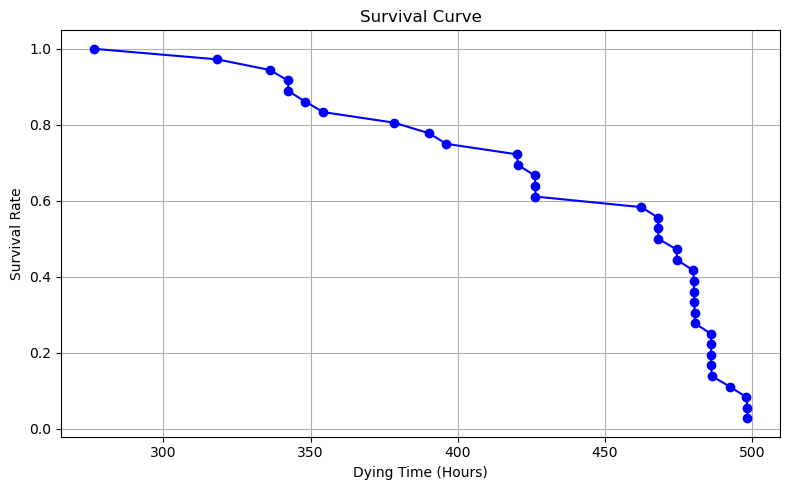

In [15]:
# Plot the survival curve
dying_times_sorted = sorted(dying_times) # Sort the dying times in ascending order

# Compute the survival rate
survival_rate = [1 - (i / len(dying_times_sorted)) for i in range(len(dying_times_sorted))]

# Plot the survival curve
plt.figure(figsize=(8, 5))
plt.plot(dying_times_sorted, survival_rate, marker='o', linestyle='-', color='blue')
plt.xlabel('Dying Time (Hours)')
plt.ylabel('Survival Rate')
plt.title('Survival Curve')
plt.grid()
plt.tight_layout()
plt.show()

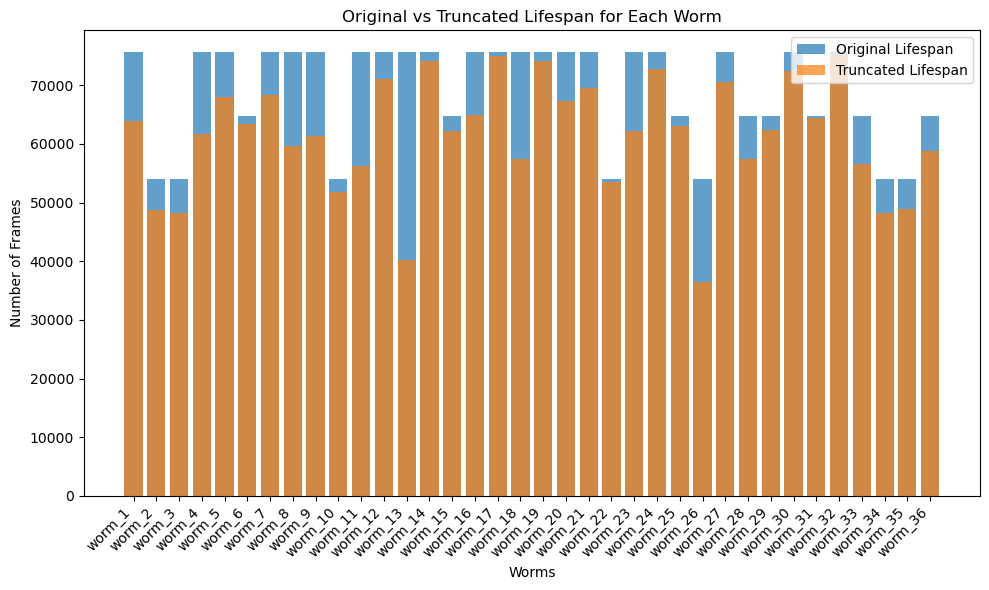

In [16]:
# Visualization

# Prepare data for the plot
original_lengths = [worms[name].shape[1] for name in worms.keys()]
truncated_lengths = [processed_worms[name].shape[1] for name in processed_worms.keys()]
worm_ids = list(worms.keys())

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(worm_ids, original_lengths, label='Original Lifespan', alpha=0.7)
plt.bar(worm_ids, truncated_lengths, label='Truncated Lifespan', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Worms')
plt.ylabel('Number of Frames')
plt.title('Original vs Truncated Lifespan for Each Worm')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
importlib.reload(helpers)

<module 'helpers' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/helpers.py'>

In [18]:
# Specify the indices of the features to standardize (e.g., Speed, X, Y)
feature_columns = [1, 2, 3, 4]  # Assuming 1 = Speed, 2 = X, 3 = Y, 4 = Changed Pixels, not standardizing the frame nummber = 0 and the catetgory = 5

# Apply per-worm standardization
standardized_worms = helpers.standardization(processed_worms, feature_columns)

In [50]:
# Retrieve the worm data
worm_3_data = standardized_worms['worm_3']  # Assuming worms is your dictionary of worm data

# Convert to a DataFrame for easier inspection
columns = ['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category']
df_worm_3 = pd.DataFrame(worm_3_data.T, columns=columns)  # Transpose for proper orientation

df_worm_3

,Frame,Speed,X,Y,Changed Pixels,Category
0,1.0,-0.152619,-3.104441,-2.284455,-0.714467,0.0
1,2.0,-0.145537,-3.104441,-2.284455,-0.689185,0.0
2,3.0,-0.144523,-3.104009,-2.284890,-0.689185,0.0
3,4.0,-0.152619,-3.103366,-2.284923,-0.714467,0.0
4,5.0,-0.125700,-3.103366,-2.284923,-0.638622,0.0
...,...,...,...,...,...,...
48297,9898.0,-0.136467,0.568785,-0.657367,-0.588058,0.0
48298,9899.0,-0.114108,0.567540,-0.656990,-0.512212,0.0
48299,9900.0,0.051598,0.569335,-0.659977,1.029982,0.0
48300,9901.0,-0.147437,0.566241,-0.640783,-0.689185,0.0


# Step 4 : Splitting the Data
> Split the worms in train worms and test worms

In [54]:
# Print the shape of raw worm data
for worm_name, worm_data in standardized_worms.items():
    print(f"{worm_name}: Shape = {worm_data.shape}")

worm_1: Shape = (6, 63872)
worm_2: Shape = (6, 48686)
worm_3: Shape = (6, 48302)
worm_4: Shape = (6, 61672)
worm_5: Shape = (6, 68073)
worm_6: Shape = (6, 63373)
worm_7: Shape = (6, 68387)
worm_8: Shape = (6, 59637)
worm_9: Shape = (6, 61280)
worm_10: Shape = (6, 51802)
worm_11: Shape = (6, 56318)
worm_12: Shape = (6, 71105)
worm_13: Shape = (6, 40293)
worm_14: Shape = (6, 74120)
worm_15: Shape = (6, 62176)
worm_16: Shape = (6, 64961)
worm_17: Shape = (6, 75080)
worm_18: Shape = (6, 57414)
worm_19: Shape = (6, 74097)
worm_20: Shape = (6, 67373)
worm_21: Shape = (6, 69543)
worm_22: Shape = (6, 53466)
worm_23: Shape = (6, 62124)
worm_24: Shape = (6, 72781)
worm_25: Shape = (6, 63091)
worm_26: Shape = (6, 36428)
worm_27: Shape = (6, 70559)
worm_28: Shape = (6, 57412)
worm_29: Shape = (6, 62461)
worm_30: Shape = (6, 72393)
worm_31: Shape = (6, 64454)
worm_32: Shape = (6, 75111)
worm_33: Shape = (6, 56604)
worm_34: Shape = (6, 48211)
worm_35: Shape = (6, 48909)
worm_36: Shape = (6, 58717)


In [55]:
train_worms, test_worms = load_data.split_worms(standardized_worms, test_size=0.2)

print(f"Training Worms: {list(train_worms.keys())}")
print(f"Testing Worms: {list(test_worms.keys())}")

Split 36 worms into 28 training and 8 testing worms.
Training Worms: ['worm_10', 'worm_13', 'worm_6', 'worm_28', 'worm_33', 'worm_20', 'worm_31', 'worm_26', 'worm_23', 'worm_27', 'worm_32', 'worm_11', 'worm_12', 'worm_29', 'worm_9', 'worm_21', 'worm_17', 'worm_36', 'worm_7', 'worm_25', 'worm_1', 'worm_35', 'worm_14', 'worm_19', 'worm_3', 'worm_34', 'worm_30', 'worm_22']
Testing Worms: ['worm_4', 'worm_24', 'worm_5', 'worm_15', 'worm_16', 'worm_18', 'worm_2', 'worm_8']


In [57]:
# Print the shape of raw worm data
for worm_name, worm_data in train_worms.items():
    print(f"{worm_name}: Shape = {worm_data.shape}")

# Print the shape of raw worm data
for worm_name, worm_data in test_worms.items():
    print(f"{worm_name}: Shape = {worm_data.shape}")

worm_10: Shape = (6, 51802)
worm_13: Shape = (6, 40293)
worm_6: Shape = (6, 63373)
worm_28: Shape = (6, 57412)
worm_33: Shape = (6, 56604)
worm_20: Shape = (6, 67373)
worm_31: Shape = (6, 64454)
worm_26: Shape = (6, 36428)
worm_23: Shape = (6, 62124)
worm_27: Shape = (6, 70559)
worm_32: Shape = (6, 75111)
worm_11: Shape = (6, 56318)
worm_12: Shape = (6, 71105)
worm_29: Shape = (6, 62461)
worm_9: Shape = (6, 61280)
worm_21: Shape = (6, 69543)
worm_17: Shape = (6, 75080)
worm_36: Shape = (6, 58717)
worm_7: Shape = (6, 68387)
worm_25: Shape = (6, 63091)
worm_1: Shape = (6, 63872)
worm_35: Shape = (6, 48909)
worm_14: Shape = (6, 74120)
worm_19: Shape = (6, 74097)
worm_3: Shape = (6, 48302)
worm_34: Shape = (6, 48211)
worm_30: Shape = (6, 72393)
worm_22: Shape = (6, 53466)
worm_4: Shape = (6, 61672)
worm_24: Shape = (6, 72781)
worm_5: Shape = (6, 68073)
worm_15: Shape = (6, 62176)
worm_16: Shape = (6, 64961)
worm_18: Shape = (6, 57414)
worm_2: Shape = (6, 48686)
worm_8: Shape = (6, 59637)


# Step 5 : Load only early Lifespan for train set and keep the whole lifespan for test (validation set)
> Now we will load only a portion of the worms

In [ ]:
#importlib.reload(load_data)

In [ ]:
#data_fraction = 0.4

#early_train_worms = load_data.load_earlylifespan(train_worms, data_fraction)

In [ ]:
# Retrieve the worm data
worm_3_data = early_train_worms['worm_3']  # Assuming worms is your dictionary of worm data

# Convert to a DataFrame for easier inspection
columns = ['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category']
df_worm_3 = pd.DataFrame(worm_3_data.T, columns=columns)  # Transpose for proper orientation

df_worm_3

# Step 6 : Prepare data for Models

# Step 6.1 : Separate features X and target Y

In [73]:
importlib.reload(load_data)

<module 'load_data' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/load_data.py'>

In [76]:
# Prepare training data
X_train = {}
y_train = {}

X_train, y_train = load_data.prepare_training_data(train_worms)
X_test, y_test = load_data.prepare_training_data(test_worms)

In [77]:
# Print the shape of raw worm data
for worm_name, worm_data in X_train.items():
    print(f"{worm_name}: Shape = {worm_data.shape}")
print("y_train values:")
for worm_name, lifespan in y_train.items():
    print(f"{worm_name}: Lifespan = {lifespan}")

    # Print the shape of raw worm data
for worm_name, worm_data in X_test.items():
    print(f"{worm_name}: Shape = {worm_data.shape}")
print("y_train values:")
for worm_name, lifespan in y_test.items():
    print(f"{worm_name}: Lifespan = {lifespan}")

worm_10: Shape = (5, 51802)
worm_13: Shape = (5, 40293)
worm_6: Shape = (5, 63373)
worm_28: Shape = (5, 57412)
worm_33: Shape = (5, 56604)
worm_20: Shape = (5, 67373)
worm_31: Shape = (5, 64454)
worm_26: Shape = (5, 36428)
worm_23: Shape = (5, 62124)
worm_27: Shape = (5, 70559)
worm_32: Shape = (5, 75111)
worm_11: Shape = (5, 56318)
worm_12: Shape = (5, 71105)
worm_29: Shape = (5, 62461)
worm_9: Shape = (5, 61280)
worm_21: Shape = (5, 69543)
worm_17: Shape = (5, 75080)
worm_36: Shape = (5, 58717)
worm_7: Shape = (5, 68387)
worm_25: Shape = (5, 63091)
worm_1: Shape = (5, 63872)
worm_35: Shape = (5, 48909)
worm_14: Shape = (5, 74120)
worm_19: Shape = (5, 74097)
worm_3: Shape = (5, 48302)
worm_34: Shape = (5, 48211)
worm_30: Shape = (5, 72393)
worm_22: Shape = (5, 53466)
y_train values:
worm_10: Lifespan = 51802
worm_13: Lifespan = 40293
worm_6: Lifespan = 63373
worm_28: Lifespan = 57412
worm_33: Lifespan = 56604
worm_20: Lifespan = 67373
worm_31: Lifespan = 64454
worm_26: Lifespan = 3642

# Step 6.2 : Truncate early lifespan on X_train,X_test but keep Y_train,Y_test full length

In [78]:
importlib.reload(load_data)

<module 'load_data' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/load_data.py'>

In [81]:
data_fraction = 0.4
early_X_train = load_data.truncate_lifespan(X_train, data_fraction)
early_X_test = load_data.truncate_lifespan(X_test, data_fraction)

worm_10: Original frames = 51802, Truncated frames = 20720
worm_13: Original frames = 40293, Truncated frames = 16117
worm_6: Original frames = 63373, Truncated frames = 25349
worm_28: Original frames = 57412, Truncated frames = 22964
worm_33: Original frames = 56604, Truncated frames = 22641
worm_20: Original frames = 67373, Truncated frames = 26949
worm_31: Original frames = 64454, Truncated frames = 25781
worm_26: Original frames = 36428, Truncated frames = 14571
worm_23: Original frames = 62124, Truncated frames = 24849
worm_27: Original frames = 70559, Truncated frames = 28223
worm_32: Original frames = 75111, Truncated frames = 30044
worm_11: Original frames = 56318, Truncated frames = 22527
worm_12: Original frames = 71105, Truncated frames = 28442
worm_29: Original frames = 62461, Truncated frames = 24984
worm_9: Original frames = 61280, Truncated frames = 24512
worm_21: Original frames = 69543, Truncated frames = 27817
worm_17: Original frames = 75080, Truncated frames = 30032

In [82]:
# Print the sizes of early_X_train and early_X_test
print("Truncated Data Sizes:")

# Sizes of early_X_train
print("\nearly_X_train:")
for worm_name, worm_data in early_X_train.items():
    print(f"{worm_name}: Original frames = {X_train[worm_name].shape[1]}, Truncated frames = {worm_data.shape[1]}")

# Sizes of early_X_test
print("\nearly_X_test:")
for worm_name, worm_data in early_X_test.items():
    print(f"{worm_name}: Original frames = {X_test[worm_name].shape[1]}, Truncated frames = {worm_data.shape[1]}")

# Print y_train and y_test
print("\nLifespans in y_train:")
for worm_name, lifespan in y_train.items():
    print(f"{worm_name}: Lifespan = {lifespan}")

print("\nLifespans in y_test:")
for worm_name, lifespan in y_test.items():
    print(f"{worm_name}: Lifespan = {lifespan}")

Truncated Data Sizes:

early_X_train:
worm_10: Original frames = 51802, Truncated frames = 20720
worm_13: Original frames = 40293, Truncated frames = 16117
worm_6: Original frames = 63373, Truncated frames = 25349
worm_28: Original frames = 57412, Truncated frames = 22964
worm_33: Original frames = 56604, Truncated frames = 22641
worm_20: Original frames = 67373, Truncated frames = 26949
worm_31: Original frames = 64454, Truncated frames = 25781
worm_26: Original frames = 36428, Truncated frames = 14571
worm_23: Original frames = 62124, Truncated frames = 24849
worm_27: Original frames = 70559, Truncated frames = 28223
worm_32: Original frames = 75111, Truncated frames = 30044
worm_11: Original frames = 56318, Truncated frames = 22527
worm_12: Original frames = 71105, Truncated frames = 28442
worm_29: Original frames = 62461, Truncated frames = 24984
worm_9: Original frames = 61280, Truncated frames = 24512
worm_21: Original frames = 69543, Truncated frames = 27817
worm_17: Original fr

# Step 6.2 : Flattend data for simple models
> Reshape and aggregate data for simple models like regression or tree-based models

In [90]:
import models
importlib.reload(models)

<module 'models' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/models.py'>

In [91]:
# Aggregate the training and testing data
window_size = 1000
aggregated_X_train, aggregated_y_train = models.aggregate_features(early_X_train, window_size)
aggregated_X_test, aggregated_y_test = models.aggregate_features(early_X_test, window_size)

# Verify shapes
print(f"Aggregated X_train shape: {aggregated_X_train.shape}")
print(f"Aggregated y_train shape: {aggregated_y_train.shape}")
print(f"Aggregated X_test shape: {aggregated_X_test.shape}")
print(f"Aggregated y_test shape: {aggregated_y_test.shape}")


ValueError: cannot reshape array of size 0 into shape (0,1000,newaxis)

# Step 6.3 : Train and evaluate the model